In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import csv
from tabulate import tabulate
%matplotlib inline

# Data Handling

In [15]:
strategies = ['none', 'all', 'old_3', 'traf_3', 'clust', 'betw', 'highmod']
vmt = {}
total_time = {}
for strat in strategies:
    vmt[strat] = []
    total_time[strat] = []

with open('traffic_output_rets.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    next(reader)
    for row in reader:
        pkl_file = row[1]
        for strat in strategies:
            if strat in pkl_file:
                vmt[strat].append(100*(float(row[5])-float(row[4]))/float(row[4]))
                total_time[strat].append(100*(float(row[3])-float(row[2]))/float(row[2]))
                break
                
with open('traffic_outputs_norets_125.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    #next(reader)
    for row in reader:
        pkl_file = row[1]
        vmt['none'].append(100*(float(row[5])-float(row[4]))/float(row[4]))
        total_time['none'].append(100*(float(row[3])-float(row[2]))/float(row[2]))
        
with open('traffic_output_rets_all.csv', 'r') as output_file:
    reader = csv.reader(output_file)
    #next(reader)
    for row in reader:
        pkl_file = row[1]
        vmt['all'].append(100*(float(row[5])-float(row[4]))/float(row[4]))
        total_time['all'].append(100*(float(row[3])-float(row[2]))/float(row[2]))
        
full_titles = {'none': 'No Retrofits Baseline',
               'all': 'All Retrofits',
               'old_3': 'Oldest Bridges Ranking',
               'traf_3': 'Highest-Traffic Ranking',
               'clust': 'Local Clustering Strategy',
               'betw': 'Betweenness Strategy',
               'highmod': 'High Modularity Strategy'}

# Scatterplot

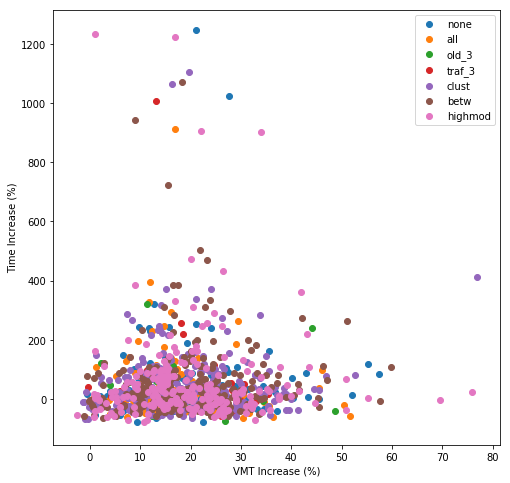

In [19]:
plt.figure(figsize=(8,8))
for strat in strategies:
    plt.scatter(vmt[strat], total_time[strat], label=strat)
plt.xlabel('VMT Increase (%)')
plt.ylabel('Time Increase (%)')
plt.legend()
plt.show()

# Stats

In [17]:
statistics = []
headers = ['time_median', 'time_mean', 'time_stdev', 'vmt_median', 'vmt_mean', 'vmt_stdev']

for strat in strategies:
    strat_stats = [strat]
    strat_stats.append(np.median(total_time[strat]))
    strat_stats.append(np.mean(total_time[strat]))
    strat_stats.append(np.std(total_time[strat]))
    strat_stats.append(np.median(vmt[strat]))
    strat_stats.append(np.mean(vmt[strat]))
    strat_stats.append(np.std(vmt[strat]))
    statistics.append(strat_stats)
        
print tabulate(statistics, headers)

           time_median    time_mean    time_stdev    vmt_median    vmt_mean    vmt_stdev
-------  -------------  -----------  ------------  ------------  ----------  -----------
none          14.0294       49.8127      158.051        17.944      19.4001     10.9765
all            1.26465      35.7347      113.844        14.8071     16.2754      9.58531
old_3         22.9635       36.1325       87.6825       15.6166     18.9354     11.261
traf_3        25.3253       75.8857      202.409        18.5329     19.6357      9.26635
clust         28.7151       52.8618      124.759        16.5777     18.7405     10.8738
betw          23.4975       55.0859      130.246        17.4835     19.0213     10.5362
highmod       19.1982       57.8887      163.01         18.0669     19.6477     11.4124


# Histograms

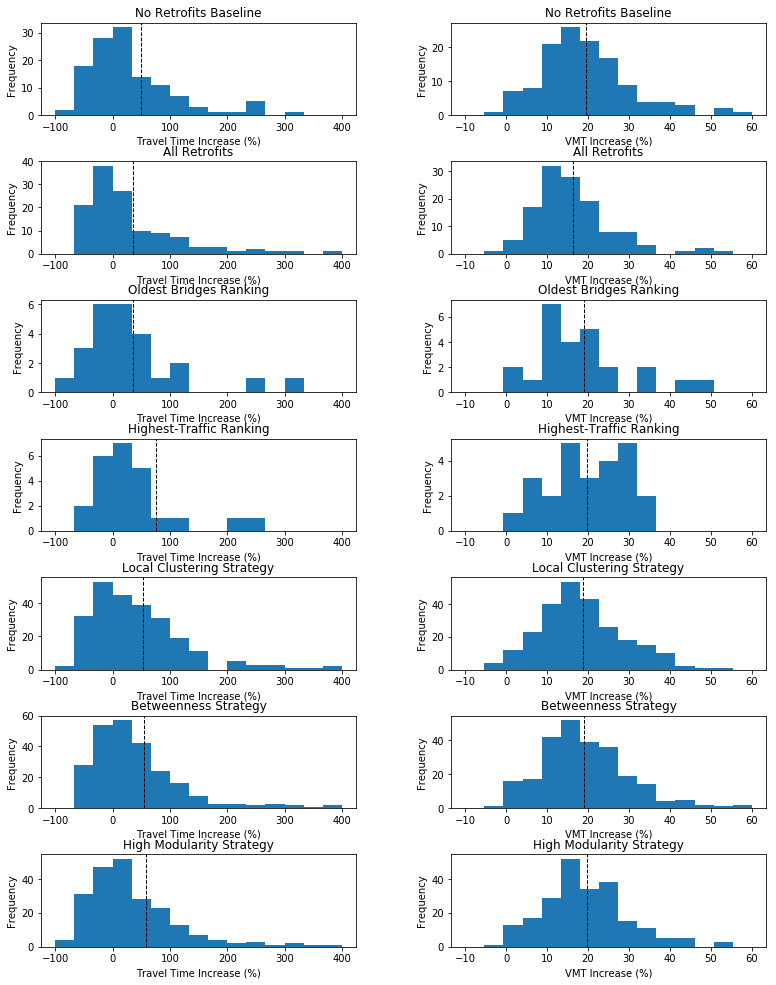

In [25]:
count = 1
plt.figure(figsize=(13,17))
for strat in strategies:
    plt.subplot(len(strategies), 2, count)
    plt.hist(total_time[strat], range=(-100, 400), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Travel Time Increase (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(total_time[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count+1)
    plt.hist(vmt[strat], range=(-10, 60), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('VMT Increase (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(vmt[strat]), color='k', linestyle='dashed', linewidth=1)
    
    count += 2
    
plt.subplots_adjust(hspace=.5, wspace=0.3)
plt.show()

# Boxplot

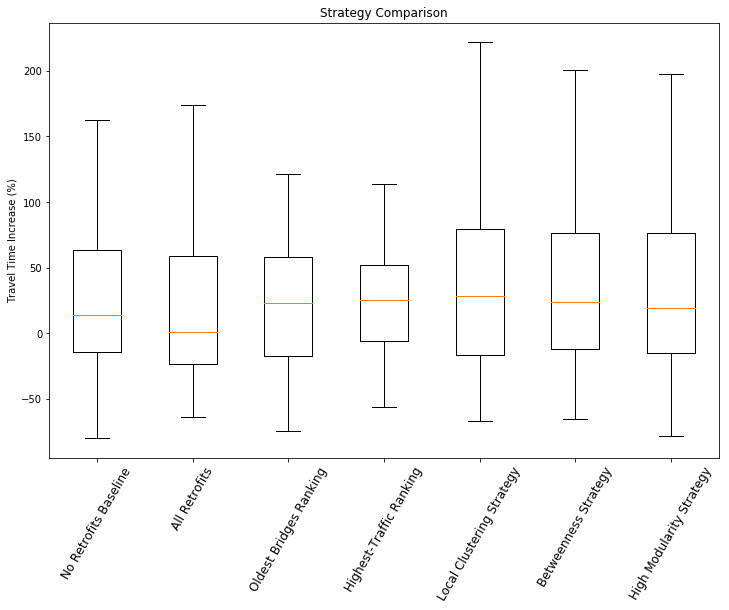

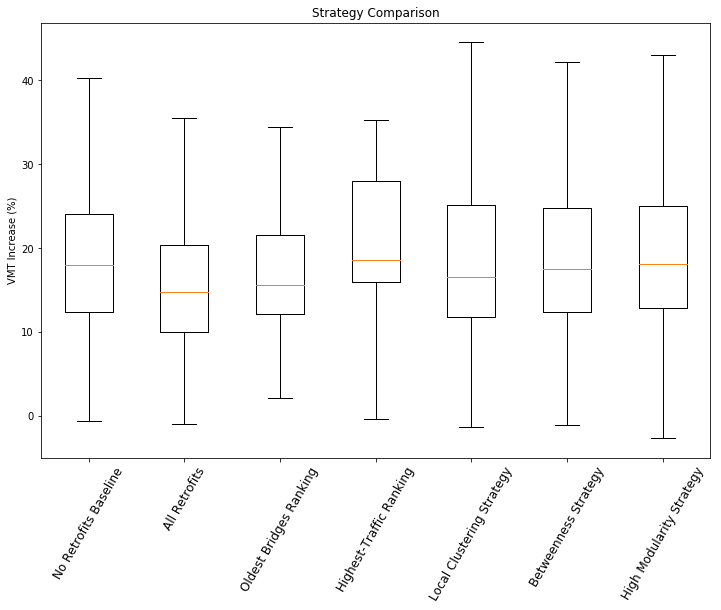

In [26]:
plt.figure(figsize=(12, 8))
full_data = [total_time[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('Travel Time Increase (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('VMT Increase (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()